<a href="https://colab.research.google.com/github/mervebudakk/python/blob/main/12_Mean_Shift_Algoritmas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.MEAN SHIFT
Meanshift, noktaları noktaya doğru kaydırarak, veri noktalarını kümelere tekrarlayan bir küme algoritmasıdır. Mod, veri noktalarının en yüksek yoğunluğu (Meanshift bağlamında bölgede) olarak anlaşılabilir. Bu şekilde, mod arayan algoritma olarak da bilinir. Meanshift algoritması görüntü işleme ve bilgisayar görüşü alanında uygulamalara sahiptir.Bir dizi veri noktası verildiğinde, algoritma her bir veri noktasını en yakın kümelenme merkezine doğru iteratif olarak atar. En yakın kümelenme merkezine olan yön, yakındaki noktaların çoğunun bulunduğu yere göre belirlenir. Böylece her bir iterasyon her veri noktası, en fazla noktanın bulunduğu yere yaklaşacak ve bu da kümelenme merkezine yönlendirecektir. Algoritma durduğunda, her nokta bir kümeye atanır.Popüler K-Means algoritmasının aksine, meanshift önceden kümelenme sayısını belirtmeyi gerektirmez. Kümelerin sayısı, veriye göre algoritma tarafından belirlenir.
İşte Meanshift'te adım adım ne olduğunu gösteren bir diyagram:


In [ ]:
#Google Drive'ınızı bağlamak için kullanılır.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


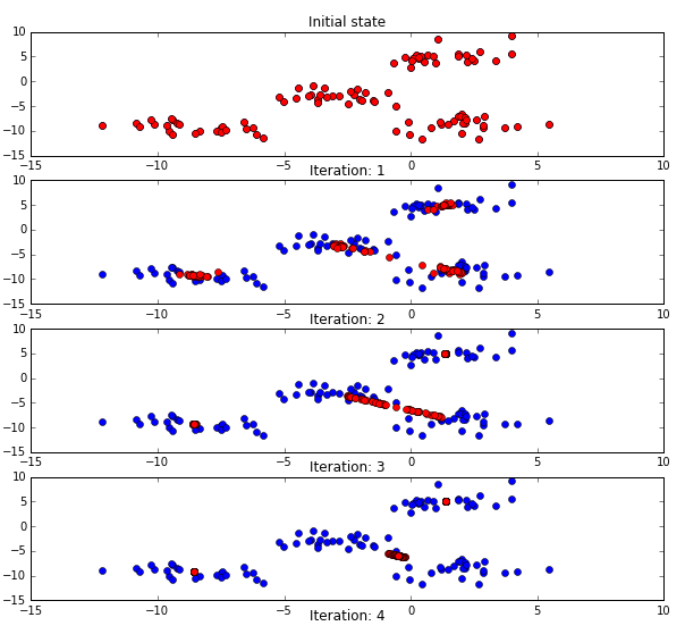

In [ ]:
from IPython.display import Image
Image(filename="/content/meanshift.png")

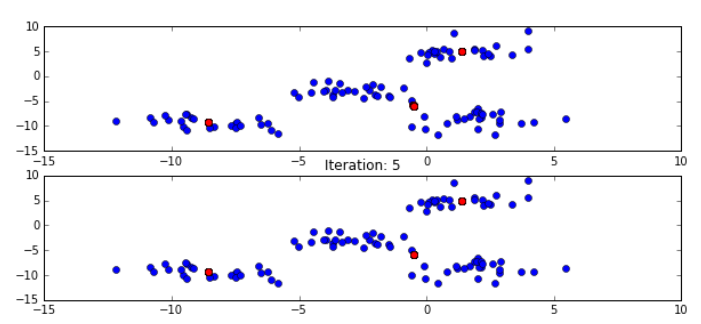

In [ ]:
Image(filename="/content/meanshift2.png")

Mavi veri noktaları ilk veri noktalarıdır ve kırmızı her bir iterasyonda bu veri noktalarının konumlarıdır. Her adım için açıklama:

1- Başlangıç hali. Kırmızı ve mavi veri noktaları, Meanshift algoritması başlamadan önce ilk iterasyonda tamamen üst üste gelir.

2-Yinelemenin sonu 1. Tüm kırmızı veri noktaları kümelere daha da yaklaşır. 4 küme olacak gibi görünüyor.

3-Yinelemenin sonu 2. Üst sağ ve sol alt kümeleri sadece iki yineleme kullanılarak yakınsamaya ulaşmış gibi görünmektedir. Orta ve alt sağ kümeler, birleşme gibi görünüyorlar, çünkü iki merkez çok yakın.

4-Yinelemenin sonu 3. Sağ üst ve alt sol merkezlerde değişiklik yok. Veri noktaları her bir kümeyi etkilediğinden, diğer iki merkezci bir araya geldiler. Bu, Meanshift imzasıdır, kümelerin sayısı önceden belirlenmemiştir.

5-Yinelemenin sonu 4. Tüm kümeler yakınsadı olmalıdır.

6-Yinelemenin sonu 5. Tüm kümelerin aslında hareketi yoktur. Tüm kırmızı veri noktaları için herhangi bir değişiklik tespit edilmediğinden algoritma burada durur.


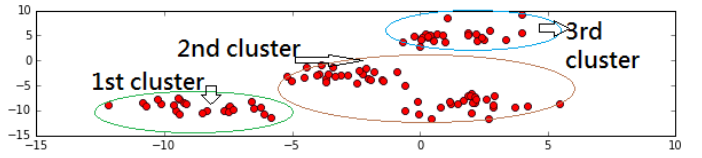

In [ ]:
Image(filename="/content/meanshift3.png")

Meanshift, yukarıda daire içine aldığım 3 kümeyi buldu. Orijinal veriler aslında 4 veri kümesinden elde edilir, ancak Meanshift'in 3 veri kümesini daha iyi temsil edebileceğini düşündüğü ve çok da kötü olmadığı için kullandı. Scikit-Learn’in make_blobs veri kümelerini kullandım:


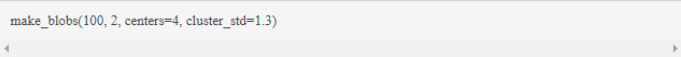

In [ ]:
Image(filename="/content/meanshiftt3.png")

Şimdi Meanshift'in genel olarak nasıl çalıştığına dair büyük bir resmimiz var. Tek bir veri noktasının ne olduğuna bakalım ve bunu tüm noktalara genelleştirelim.
<br/><br/>
Aşağıda Meanshift üzerinden yeni bir veri noktaları kümesinde tek bir veri noktası çalıştırıyoruz. Tek veri noktası siyah okla işaret edilir.


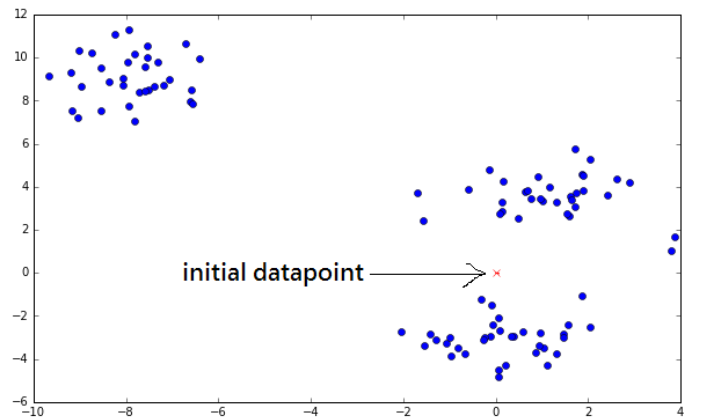

In [ ]:
Image(filename="/content/meanshift4.png")

En yakın nokta kümeleri ilk veri noktasının güneyi veya kuzeyi olabilir. Meanshift algoritmasını çalıştıran verilerin, veri noktasını ya güney ya da kuzeydeki veri noktalarına yaklaştırması gereken verileri inceleyerek söyleyebiliriz.


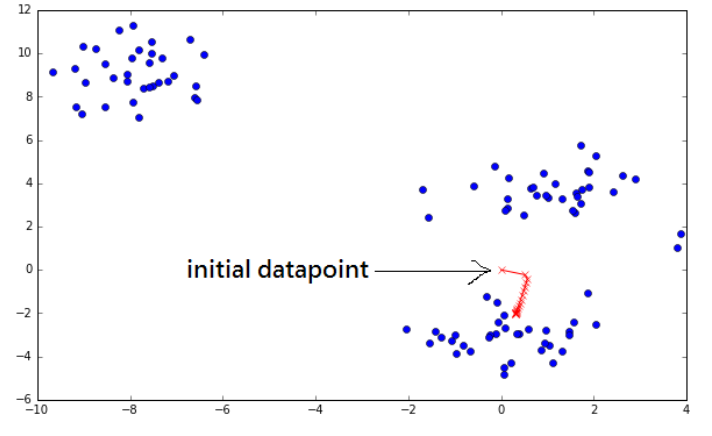

In [ ]:
Image(filename="/content/meanshift5.png")

Kırmızı yol, noktanın her bir iterasyondan sonra güney küme merkezine yaklaştığını göstermektedir. Her iterasyondan sonra hareketin kademeli olarak azaldığını fark edebilir ve bunun nedeni veri noktasının merkeze daha yakın olmasından ötürü, kaymanın daha az şiddetli olmasıdır. 10 tekrardan sonra, nokta gerçekten merkeze yakın. Araç kayması bunu K iterasyonları için tüm veri noktaları için yapar. Çoğu durumda, 5 yineleme yakınsama için yeterli olmalıdır. Bundan, algoritmanın çalışma zamanı karmaşıklığının O (KN2) olduğunu, N'nin veri noktası sayısı olduğunu ve K'nin Meanshift'in yineleme sayısı olduğunu söyleyebiliriz.
<br/><br/>
Tek bir nokta hareketini göstermek için bu uygulamanın tüm veri noktalarının hareket ettiği yerden biraz farklı olduğuna dikkat edin, ancak fikir temelde aynıdır. Merak için, tüm veri noktaları hareket ederse, her bir komşu veri noktasını daha büyük ölçüde etkileyecektir. Sonuç, algoritmanın daha hızlı bir şekilde birleşmesidir: bu versiyonda ~ 10 tekrarlamaya karşı ~ 3 tekrarlama.


##1.1 Mean Shift Algoritması
Meanshift'i bir takım veri noktaları X üzerinde çalıştırmaya başlamadan önce birkaç şeye ihtiyacınız olacak:


1. Bir x (X) noktasının komşularını belirlemek için N (x) fonksiyonu kullanılır. Komşu noktalar belli bir mesafe içindeki noktalardır. Mesafe metriği genellikle Öklid Mesafesidir.

2. Meanshift'te kullanılacak bir çekirdek K (d). K genellikle bir Gauss Çekirdeğidir ve d iki veri noktası arasındaki mesafedir.

Şimdi, yukarıdaki ile, bu bir dizi veri noktası X için Ortalama Shift algoritmasıdır:

Her bir x ∈ X veri noktası için x'in komşu noktalarını (N (x)) bulun.
Her bir x ∈ X veri noktası için, bu denklemden m (x) ortalama kaymasını hesaplayın:


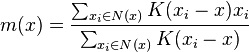

In [ ]:
Image(filename="/content/formul1.png")

3.  Her bir x ∈ X veri noktası için x ← m (x) dosyasını güncelleyin.
4. N_iteations için veya noktalar neredeyse hareket etmeden veya hareket            etmedikçe tekrarlayın.
      
En önemli parça m (x) ortalama kayması hesaplamaktır. 2. adımdaki formül, göz korkutucu görünüyor, ancak onu bozalım. Kırmızı kırmızılı bölümlerin aslında aynı olduğuna dikkat edin:


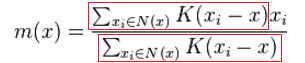

In [ ]:
Image(filename="/content/formul2.png")

Bunu Wi ile değiştirelim, böylece formül şöyle olur:


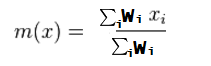

In [ ]:
Image(filename="/content/formul3.png")

Wikipedia'da ağırlıklı ortalama genel formülüne bakın bize şunu verir:


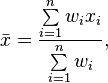

In [ ]:
Image(filename="/content/formul4.png")

Özetlemek gerekirse: Algoritma, bir veri noktasını etkileyen bir dizi yakın nokta bulup daha sonra noktaların çoğunun bulunduğu yere doğru kaydırır ve en yakın noktaların diğer noktalardan daha fazla etkisi vardır. Hiçbir şey değişmeyene kadar tüm veri noktaları için bunu tekrarlayın.


##1.1 Mean Shift  İşleminin Uygulanması


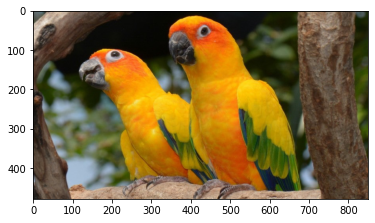

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from PIL import Image
import matplotlib.pyplot as plt

#Burada Scikit-Learn kütüphanesini kullanarak bir görüntü üzerinde görüntü segmentasyonunu Meanshift ile yapılabilmesi için kütüphaneler eklenmiştir.


image = Image.open("/content/mean_foto2.jpg")

# Kullanacağımız resmi ‘open’ fonksiyonu ile açıp ‘resim’ değişkenine atıyoruz.

image = np.array(image)

original_shape = image.shape

# Resmin 687x1025 RGB kanallarına ulaşılır.

X = np.reshape(image, [-1, 3])

# Resim düzleştirilir.

plt.imshow(image)


37.91250682367278
(406300,)
(6, 3)
number of estimated clusters : 6


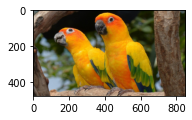

In [ ]:
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=100)

print(bandwidth)

#Resmimizden (veri noktaları) kullanmak için çekirdek bant genişliğini yazılır.

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms.fit(X)

#Şimdi X'te saklanan görüntü segmentasyonunu yapmak için görüntü üzerine Meanshift'i çalıştırın.

labels = ms.labels_

print(labels.shape)

cluster_centers = ms.cluster_centers_

print(cluster_centers.shape)

labels_unique = np.unique(labels)

n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" %n_clusters_)

#Ne yapıldığını anlamak için bazı hata ayıklama bilgileri yazdırın. Görünen bu 4 küme 4 renk verdi. Burası farklı parametrelerle yeniden çalıştırılırsa, farklı sonuçlar bulunabilir.

segmented_image = np.reshape(labels, original_shape[:2])

# Sadece boyut al, RGB kanallarını görmezden gelinir.

plt.figure(2)

plt.subplot(1, 2, 1)

plt.imshow(image)



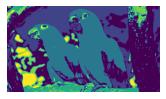

In [ ]:
plt.axis('off')

plt.imsave("/content/rotate_1.jpg",image)

plt.subplot(1, 2, 2)

plt.imshow(segmented_image)

plt.axis('off')

plt.imsave("/content/rotate_2.jpg",segmented_image)

#Mean Shift uygulanmış görüntü ve orjinal görüntü klasöre kaydedilir.